# Tesla Stock Price Forecasting

In this project, we focus on forecasting the future stock prices of Tesla Inc. by leveraging time-series modeling techniques, specifically the ARIMA model, which has shown effective results in capturing stock market trends and patterns.

This notebook is divided into several key tasks, aimed at not only generating accurate price forecasts but also providing valuable insights into future market trends and potential risks.

In [1]:
import os
import sys
sys.path.append(os.path.join(os.path.dirname('../'), 'src'))

from forecasting import StockForecasting

forecasting = StockForecasting()

In [2]:
# Load the data
stoke_data = forecasting.import_data('../data/raw/stoke_data.csv')

# Trained model and scaler path
model_path_tsla = '../models/arima_model_TSLA.pkl'
scaler_path_tsla = '../models/scaler_TSLA.joblib'

In [3]:
print(stoke_data.index)

DatetimeIndex(['2015-01-02', '2015-01-05', '2015-01-06', '2015-01-07',
               '2015-01-08', '2015-01-09', '2015-01-12', '2015-01-13',
               '2015-01-14', '2015-01-15',
               ...
               '2024-10-17', '2024-10-18', '2024-10-21', '2024-10-22',
               '2024-10-23', '2024-10-24', '2024-10-25', '2024-10-28',
               '2024-10-29', '2024-10-30'],
              dtype='datetime64[ns]', name='Date', length=2474, freq=None)


## Forecast the stock price of the TSLA

In [4]:
TSLA_ARIMA_Predictions = forecasting.generate_future_predictions(stoke_data, 'TSLA', model_path_tsla, scaler_path_tsla, 365)

## Visualize forecast with Confidence interval

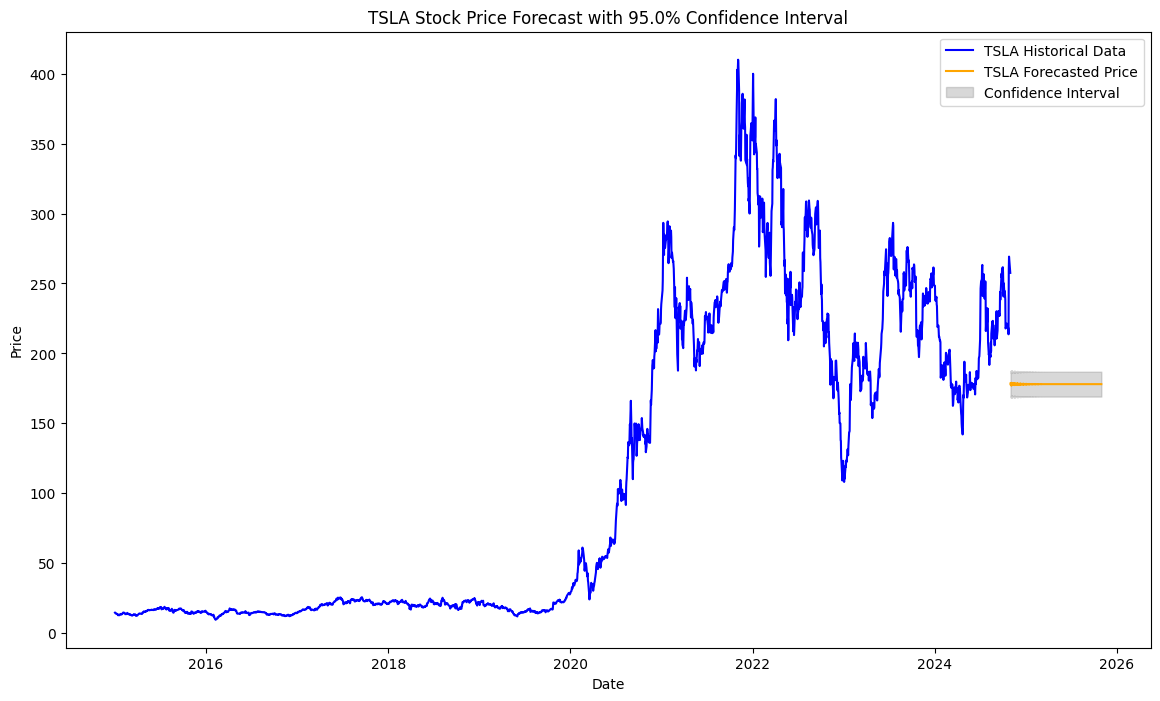

In [5]:
forecasting.visualize_forecast('TSLA', stoke_data, TSLA_ARIMA_Predictions, 0.05)

## Results Interpretation and Analysis

In [6]:
forecasting.evaluate_forecast('TSLA', TSLA_ARIMA_Predictions)

Trend Evaluation: The forecast indicates a `decreasing` trend.
Volatility Evaluation: The forecasted data exhibits a volatility level of $2.75$.
Risk Indicator: The downward trend suggests potential risks with price declines.


The output in the image provides the following analysis based on the forecasted data:

**Trend Evaluation:**

- The forecast indicates a decreasing trend. This suggests that the forecasted prices are generally expected to decline over the prediction period.

**Volatility Evaluation:**

- The forecasted data shows a volatility level of 2.75. Volatility measures the degree of variation in price over time, and a value of 2.75 indicates moderate to high fluctuation in prices, which could imply a somewhat risky asset.

**Risk Indicator:**

- Due to the downward trend, the output signals a potential risk with price declines. This could indicate caution for investors or stakeholders, as the price trend is projected to decrease.
Overall, this analysis suggests a bearish outlook with moderate to high volatility, signaling potential risks if the trend continues.

# Merge and Save the predictions

Here I will add some predictions for `Vanguard Total Bond Market ETF (BND)` and `S&P 500 ETF (SPY)`, then it's combined with ARIMA_Predictions (of TSLA) and Export to processed data.


In [7]:
# Trained model and scaler path
model_path_bnd = '../models/arima_model_BND.pkl'
scaler_path_bnd = '../models/scaler_BND.joblib'

# Trained model and scaler path
model_path_spy = '../models/arima_model_SPY.pkl'
scaler_path_spy = '../models/scaler_SPY.joblib'

In [8]:
BND_ARIMA_Predictions = forecasting.generate_future_predictions(stoke_data, 'BND', model_path_bnd, scaler_path_bnd, 365)
SPY_ARIMA_Predictions = forecasting.generate_future_predictions(stoke_data, 'SPY', model_path_spy, scaler_path_spy, 365)

In [9]:
forecasting.combine_and_export(TSLA_ARIMA_Predictions, BND_ARIMA_Predictions, SPY_ARIMA_Predictions)